In [1]:
from numpy import random 
import numpy as np 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
def mandelbrot(c,max_iters):
    counter=0
    threshold=2
    Z_now=complex(0,0)
    while(counter<max_iters):
        Z_next=pow(Z_now,2)+c
        if(abs(Z_next)>threshold):
            return counter
        Z_now=Z_next
        counter+=1
    return max_iters

In [3]:
def point_counter(x,y,max_iters):
    '''
    Function to count number of points in the Mandelbrot Set
    '''
    counter=0
    for i,x_i in enumerate(x):
        c=complex(x_i,y[i])
        check=mandelbrot(c,max_iters)
        if check==max_iters : counter+=1
    return counter


In [4]:
def area_estimate(x,y,max_iters):
    a=point_counter(x,y,max_iters)# Number of points in the mandelbrot set
    A_total=(max(x)-min(x))*(max(y)-min(y))
    A=A_total*a/len(x)#Area estimate
    print(A)
    return A


In [5]:
def create_grid(x,y,max_iters):
    X,Y=np.meshgrid(x,y)
    C=np.vectorize(complex)(X,Y) 
    Z=[]
    for row in C: 
        Z_row=[]  
        for c in row: 
            Z_row.append(mandelbrot(c,max_iters))
        Z.append(Z_row) 
    Z=np.array(Z)
    return Z


In [7]:
def plot_fractal(Z,x1,x2,y1,y2):
    plt.figure(figsize=(10,7))
    plt.imshow(Z,extent=(x1,x2,y1,y2),cmap='Blues_r',interpolation='bilinear')
    plt.colorbar(label='Iterations to escape')
    plt.title('Mandelbrot Set')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.show()



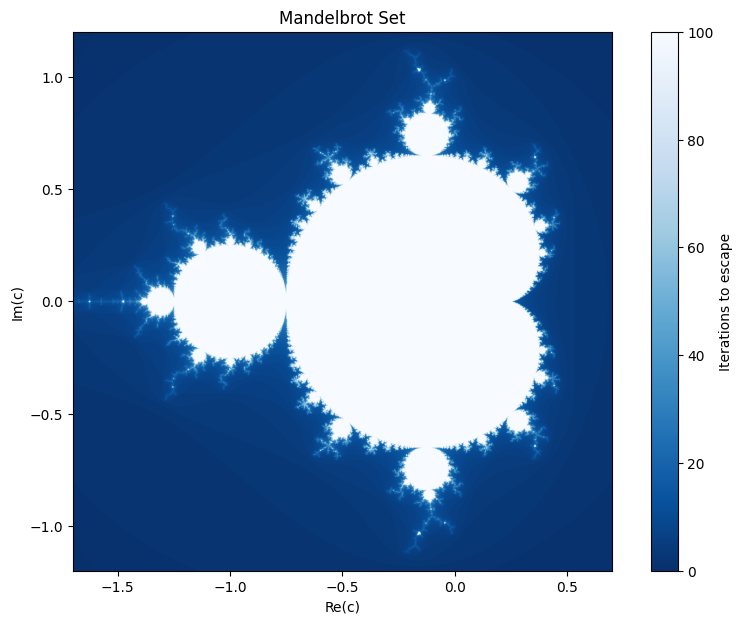

In [8]:
    max_iters=100
n=1000
x=np.linspace(-1.7,0.7,n)  
y=np.linspace(-1.2,1.2,n)
plot_fractal(create_grid(x,y,max_iters),min(x),max(x),min(y),max(y),)